# 1 - Define the problem / Questions

# 2. Data Collections -

# 3 - Data Cleaning  -
- Handle missing values

- Identify and remove duplicates

- handle outliers

- Transform the data into suitable format

# 4- EDA - Exploratory Data Analysis.

# 5- Data Visualization -

# 6 - Analyze the insights & Report


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
titanic = sns.load_dataset('titanic')

In [9]:
#initial data inspection

In [10]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [12]:
#As we seen , the data contain some missing values.
#so lets check the exact number

In [13]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

#insights

- age - 177 missing values - should be imputed based on pclass or sex - replace by mean or median

- embarked - 2 missing values - can be filled with mode

- deck - massive missing values - better to drop this column


# .fillna()

# .dropna - .dop()

In [14]:
#fill with median age based on pclass & sex

In [15]:
titanic['age'] =titanic.groupby(['pclass', 'sex'])['age'].transform(lambda x : x.fillna(x.median()))

In [16]:
titanic['age'].isnull().sum()

0

In [17]:
#replace embark with mode

In [18]:
titanic['embarked'].mode()[0]

'S'

In [19]:
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace = True)
#inplace = True is for permenent changes

<ipython-input-19-ad8b6e37aa77>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace = True)


In [20]:
titanic['embarked'].isnull().sum()

0

In [21]:
titanic.drop(columns=['deck'], inplace= True)

In [22]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [23]:
titanic.drop(columns=['who', 'embark_town', 'alive', 'adult_male'] , inplace= True)

In [24]:
titanic.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
class       0
alone       0
dtype: int64

In [25]:
titanic.shape

(891, 10)

After dropping unwanted columns the titanic dataset now has 891 rows describe the 891 passenger details and 10 columns which shows the passenger features.

In [26]:
#lets check for statistical summery of the data -

In [27]:
titanic.describe(include='all')

survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  891.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.112424    0.523008    0.381594   
std       0.486592    0.836071   NaN   13.304424    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   21.500000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   26.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   36.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              fare embarked  class alone  
count   891.000000      891    891   891  
unique         NaN        3      3     2  
top            NaN        S  Third  True  
freq           NaN      646    491   537  
mean     32.204208      NaN    NaN   NaN  
std      49.693429      NaN    NaN   NaN  
min       0.000000      NaN    NaN   NaN  
25%       7.910400      NaN    NaN   NaN  
50%      14.454200      NaN    NaN   NaN  
75%      31.000000      NaN    NaN   NaN  
max     512.329200      NaN    NaN   NaN

 - survival rate only 38% while 62% did not survived

- half of the passenger were in third class

- most passenger were young adult - median age = 26 year

- must be outlier in age shown 80 year old also

- median fare 14.45 but max was 512.33 - it also may contain outliers

-most passenger travel alone

- most passenger embarked from 'S'

- most passenger class is Third class

In [28]:
titanic.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [29]:
titanic.duplicated().sum()

118

In [30]:
titanic.drop_duplicates(inplace= True)

In [31]:
titanic.duplicated().sum()

0

In [32]:
titanic.shape

(773, 10)

In [33]:
titanic.head(1)

survived  pclass   sex   age  sibsp  parch  fare embarked  class  alone
0         0       3  male  22.0      1      0  7.25        S  Third  False

# EDA

In [34]:
#1 - What is the overall distribution of passengers across different classes (Pclass)?

In [35]:
titanic['pclass'].unique()

array([3, 1, 2])

In [36]:
pclass_count = titanic['pclass'].value_counts().sort_index()

In [37]:
pclass_count

pclass
1    209
2    164
3    400
Name: count, dtype: int64

In [38]:
pclass_count.index

Index([1, 2, 3], dtype='int64', name='pclass')

In [39]:
pclass_count.values

array([209, 164, 400])

<ipython-input-40-2890497b755a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = pclass_count.index, y = pclass_count.values ,


Text(0.5, 1.0, 'Distribution of passenger accross different Pclass')

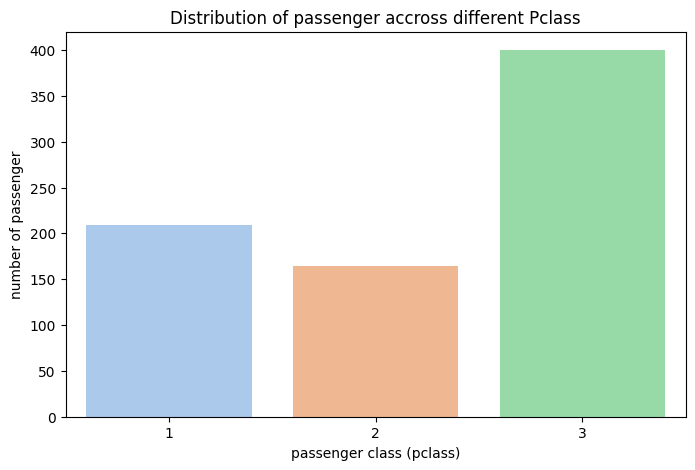

In [40]:
plt.figure(figsize= (8,5))
sns.barplot(x = pclass_count.index, y = pclass_count.values ,
            palette = 'pastel')
plt.xlabel("passenger class (pclass)")
plt.ylabel("number of passenger")
plt.title("Distribution of passenger accross different Pclass")

Insights from pclass distribution

- Majority of the passenger traveled in pclass3, indicating it was the most affordable and popular

- Pclass 1 had the least number of passenger , suggesting that fewer people could afford luxury travel

- pclass2 - had moderate number of passenger showing a middle class passenger presence on the titanic.

In [41]:
#2 - How is the age of passengers distributed?

Text(0.5, 1.0, 'Distribution of Passenger Ages on Titanic ')

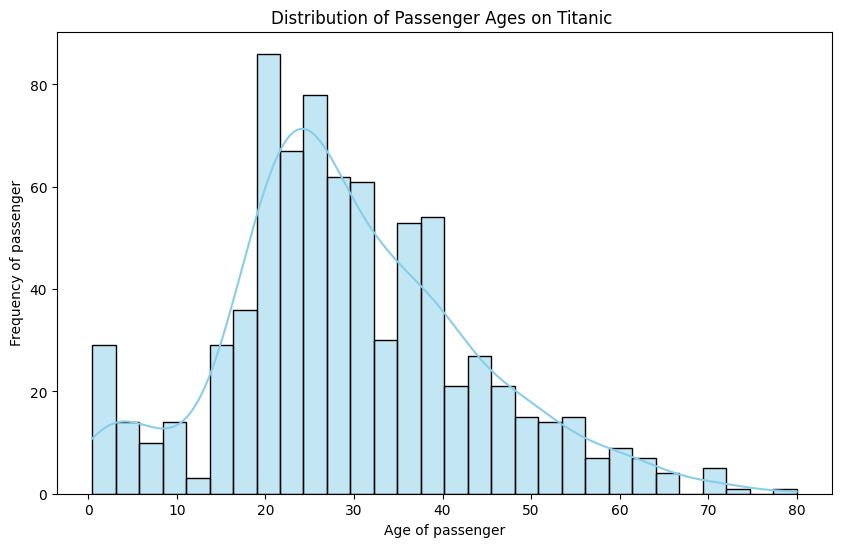

In [42]:
plt.figure(figsize=(10,6))
sns.histplot(data = titanic , x = 'age' , bins = 30,
             kde= True, color ='skyblue')
plt.xlabel("Age of passenger")
plt.ylabel("Frequency of passenger")
plt.title("Distribution of Passenger Ages on Titanic ")

Insights from age distribution

- The peak age group is 20-30 year . indicating many young adults traveled.

- there are fewer childresn (age < 10) and elderly (age > 60)  on board

- the age distributioin has a long tail on the right, indicating some passengers were much older (May be outlier) , not supposed to be board.

In [43]:
#3-What is the distribution of passengers based on Sex?

In [44]:
titanic['sex'].unique()

array(['male', 'female'], dtype=object)

In [45]:
gender_count = titanic['sex'].value_counts()

In [46]:
gender_count

sex
male      482
female    291
Name: count, dtype: int64

In [47]:
gender_count.index

Index(['male', 'female'], dtype='object', name='sex')

In [48]:
gender_count.values

array([482, 291])

<ipython-input-49-f7ecc667f25b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = gender_count.index, y = gender_count.values ,


Text(0.5, 1.0, 'Distribution of Passenger based on gender')

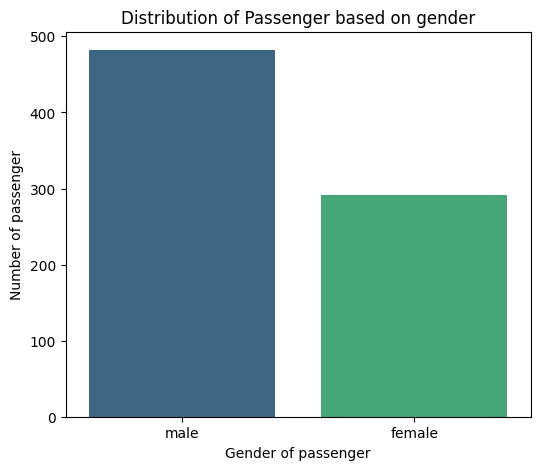

In [49]:
plt.figure(figsize=(6,5))
sns.barplot(x = gender_count.index, y = gender_count.values ,
            palette= 'viridis' )
plt.xlabel("Gender of passenger")
plt.ylabel("Number of passenger")
plt.title("Distribution of Passenger based on gender")

Insights from Gender Distribution

- The dataset shows more Male Passenger than Females

- Since the titanic was a mix emigrants , workers, healthly workers, men might have travled more for work and opportunity.

In [50]:
#4 How many passengers embarked from each port (Embarked)?

In [51]:
titanic['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [52]:
# S - Southampton , C - Cherbourg , Q - Queenstown

In [53]:
embarked_count = titanic['embarked'].value_counts()

In [54]:
embarked_count

embarked
S    562
C    153
Q     58
Name: count, dtype: int64

<ipython-input-55-221eba30399c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=embarked_count.index, y =embarked_count.values,


Text(0.5, 1.0, 'Number of passenger embarked from each port')

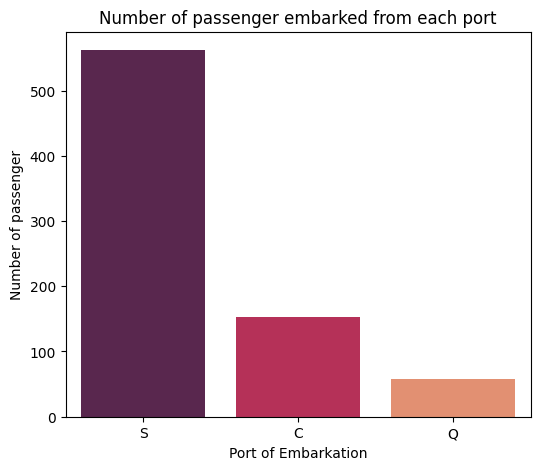

In [55]:
plt.figure(figsize= (6,5))
sns.barplot(x=embarked_count.index, y =embarked_count.values,
            palette= 'rocket')
plt.xlabel("Port of Embarkation")
plt.ylabel("Number of passenger")
plt.title("Number of passenger embarked from each port")

Insights from Embarked Distribution

- Manjority of passenger embarked from S - Southampton

- Moderate passenger embarked from C - Cherbourg

- Q - Queenstown had least number of passenger

In [56]:
# What is the survival rate overall, and how does it vary by Pclass?

In [57]:
overall_survival_rate = titanic['survived'].mean()*100

In [58]:
overall_survival_rate

41.52652005174644

In [59]:
survival_by_pclass = titanic.groupby('pclass')['survived'].mean()*100

In [60]:
survival_by_pclass

pclass
1    64.114833
2    50.609756
3    26.000000
Name: survived, dtype: float64

In [61]:
survival_by_pclass.index

Index([1, 2, 3], dtype='int64', name='pclass')

In [62]:
survival_by_pclass.values

array([64.11483254, 50.6097561 , 26.        ])

<ipython-input-63-b16b343fb9f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_pclass.index , y = survival_by_pclass.values,


Text(0.5, 1.0, 'Survival Rate by Pclass')

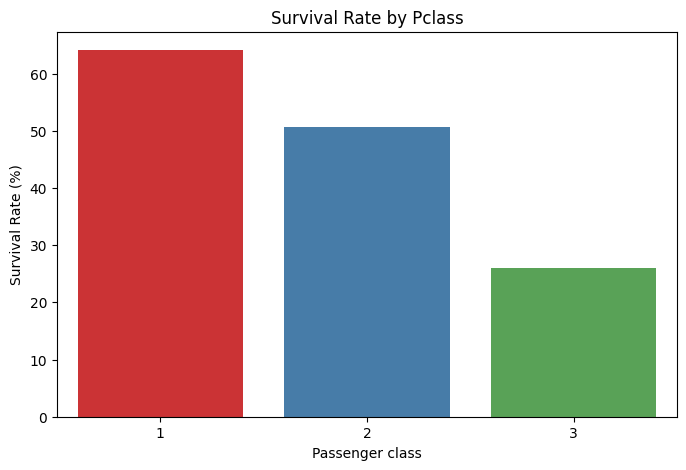

In [63]:
plt.figure(figsize=(8,5))
sns.barplot(x=survival_by_pclass.index , y = survival_by_pclass.values,
            palette= 'Set1')
plt.xlabel("Passenger class")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Pclass")

Insighta on Surviaval rate by Pclass

- Only 41% of passenger survived, indicating a high fatality rate

- 1st class had highest survival rate ~ 64% ,passenger had better access to lifeboats and safety

-Moderate survival rate in 2nd class ~50% , some middle class passengers survived byt not as many as pclass1

-lowest survival rate in 3rd class - 26% , passenger due to fewer safety resourses.

In [64]:
#What is the survival rate for males vs. females?

In [65]:
survival_by_gender = titanic.groupby('sex')['survived'].mean()*100

In [66]:
survival_by_gender

sex
female    73.883162
male      21.991701
Name: survived, dtype: float64

<ipython-input-67-723dc8254068>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = survival_by_gender.index, y =survival_by_gender.values, palette='Set1' )


Text(0.5, 1.0, 'Survival Rate by Gender')

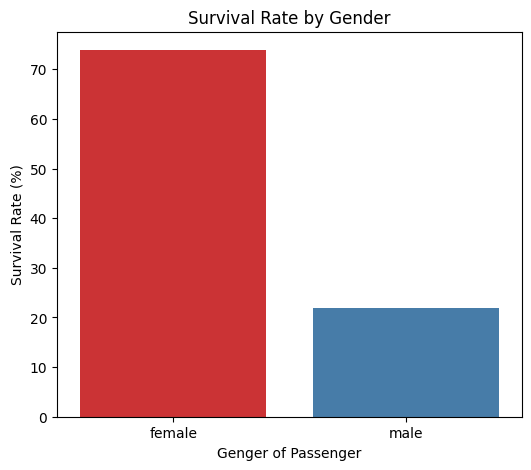

In [67]:
plt.figure(figsize=(6,5))
sns.barplot(x = survival_by_gender.index, y =survival_by_gender.values, palette='Set1' )
plt.xlabel("Genger of Passenger")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Gender")

Insights on Survival Rate By Gender

- Female had a much higher survival rate (~74%)
- Women were prioritized during evacuation
- Many first class & second class womens had a better access to lifeboats

-Males had very low survival rate (~21%%)
- Many men did not get lifeboats deu to evacuatioin policy.
-

In [68]:
survival_by_embarked = titanic.groupby("embarked")["survived"].mean() * 100

In [69]:
survival_by_embarked

embarked
C    58.823529
Q    34.482759
S    37.544484
Name: survived, dtype: float64

<ipython-input-70-3306ee99ea82>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_embarked.index, y=survival_by_embarked.values, palette="pastel")


Text(0.5, 1.0, 'Survival Rate by Embarkation Point')

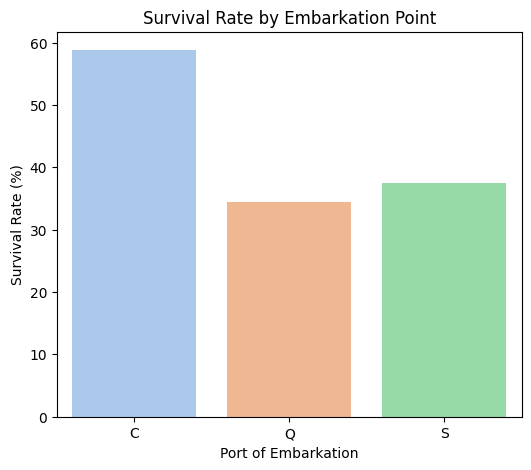

In [70]:
plt.figure(figsize=(6, 5))
sns.barplot(x=survival_by_embarked.index, y=survival_by_embarked.values, palette="pastel")

plt.xlabel("Port of Embarkation")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Embarkation Point")

Passengers from C (Cherbourg) had the highest survival rate (~58.8%)

-Many first-class passengers boarded from Cherbourg, leading to a higher survival rate.

-Southampton had the highest number of third-class passengers, which reduced survival chances.

-Most passengers from Queenstown were in third class, which had the worst survival rate.

In [71]:
#8 How does the survival rate vary across different ticket classes (Pclass)?

In [72]:
survival_by_pclass = titanic.groupby("pclass")["survived"].mean() * 100

In [73]:
survival_by_pclass

pclass
1    64.114833
2    50.609756
3    26.000000
Name: survived, dtype: float64

<ipython-input-74-6d4d2056ae8f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_pclass.index, y=survival_by_pclass.values, palette="pastel")


Text(0.5, 1.0, 'Survival Rate by Passenger Class')

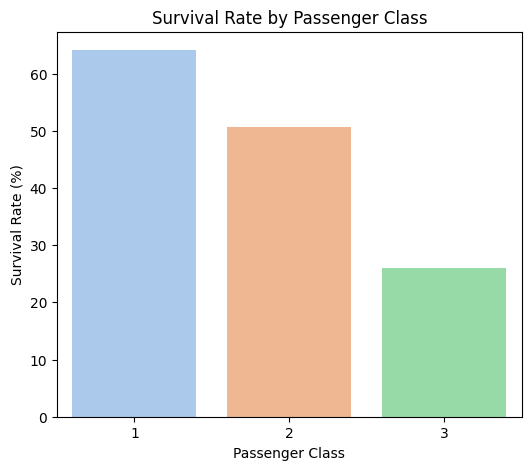

In [74]:
plt.figure(figsize=(6, 5))
sns.barplot(x=survival_by_pclass.index, y=survival_by_pclass.values, palette="pastel")

plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Passenger Class")

First-Class (Pclass = 1) had the highest survival rate (~64.1%)

First-class passengers were given priority in lifeboats.
Many wealthier individuals had cabins near the deck, making evacuation easier.
Second-Class (Pclass = 2) had a moderate survival rate (~50.6%)

These passengers had a fair chance of survival but were not prioritized like first-class.
Third-Class (Pclass = 3) had the lowest survival rate (~26.0%)

Many third-class passengers were in the lower decks, making escape difficult.
Limited access to lifeboats contributed to a high fatality rate.

In [75]:
#9  Is there any relationship between the number of siblings/spouses aboard (SibSp) and survival?

In [76]:
survival_by_sibsp = titanic.groupby("sibsp")["survived"].mean() * 100

In [77]:
survival_by_sibsp

sibsp
0    38.658777
1    53.000000
2    44.444444
3    28.571429
4    16.666667
5     0.000000
8     0.000000
Name: survived, dtype: float64

<ipython-input-78-4f3655e02c5a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_sibsp.index, y=survival_by_sibsp.values, palette="pastel")


Text(0.5, 1.0, 'Survival Rate by Sibsp')

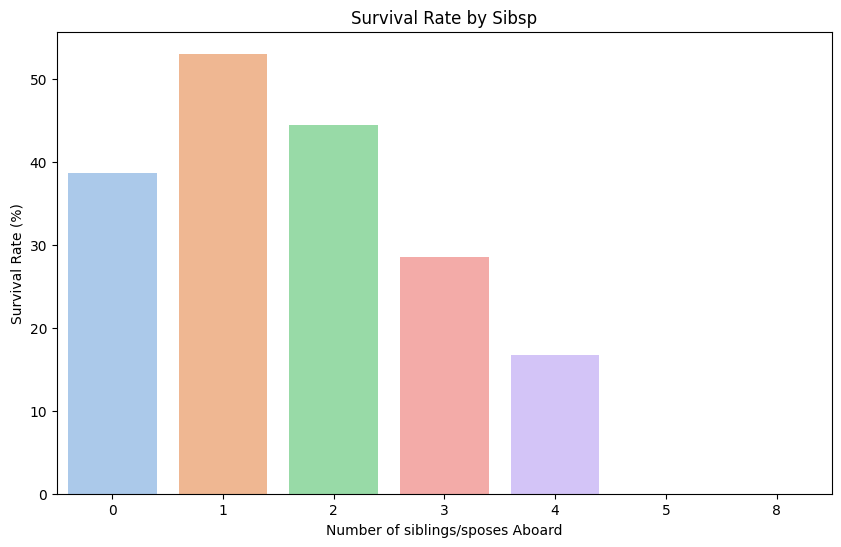

In [78]:
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_by_sibsp.index, y=survival_by_sibsp.values, palette="pastel")

plt.xlabel("Number of siblings/sposes Aboard")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Sibsp")

Best survival rate: Small families (1–2 SibSp).

Worst survival rate: Large families (3+ SibSp).

No survivors: Passengers with 5+ SibSp.

In [79]:
#  How does the number of parents/children aboard (Parch) affect survival?

In [80]:
survival_by_parch = titanic.groupby("parch")["survived"].mean() * 100

In [81]:
survival_by_parch

parch
0    37.609842
1    55.263158
2    53.333333
3    60.000000
4     0.000000
5    20.000000
6     0.000000
Name: survived, dtype: float64

<ipython-input-82-22c25f2417f6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_parch.index, y=survival_by_parch.values, palette="pastel")


Text(0.5, 1.0, 'Survival Rate by Parch')

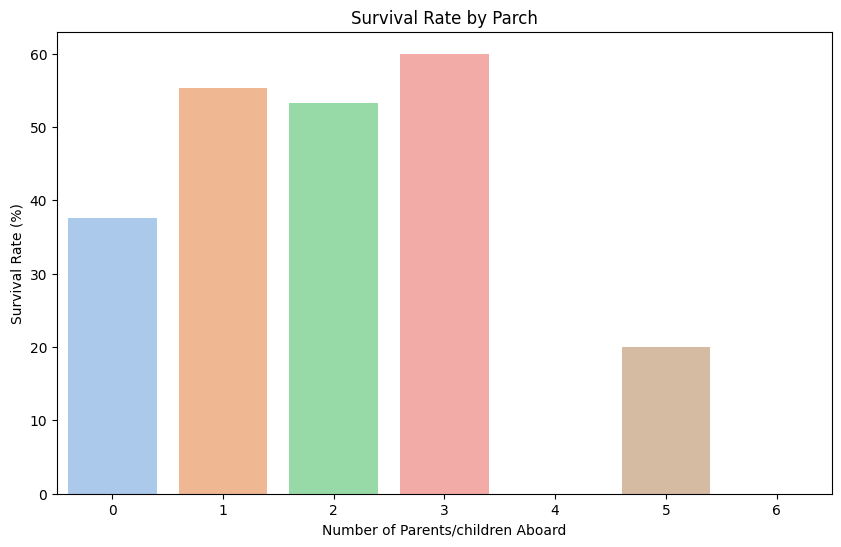

In [82]:
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_by_parch.index, y=survival_by_parch.values, palette="pastel")

plt.xlabel("Number of Parents/children Aboard")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Parch")

- Passengers with 1–3 Parents/Children Had Higher Survival Rates (~53–60%)

Families with small children or parents may have received priority during evacuation.
They likely got more assistance and access to lifeboats.

Passengers Traveling Alone (Parch = 0) Had Lower Survival (~37.6%)

Traveling alone reduced chances of getting help.
They were less likely to be prioritized.

- Passengers with 4+ Parch Had the Worst Survival Rates (0-20%)

Large families likely struggled to stay together.
Difficulty in securing spots for all members in lifeboats.
Parch = 4 & 6 had 0% survival, indicating entire families perished.

In [83]:
#How does the fare distribution vary across different passenger classes (Pclass)?

In [84]:
#lets check the fare distribution contain outlier or not with pclass

<ipython-input-85-4d0fde463e6e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = titanic, x='pclass', y ='fare', palette='pastel')


Text(0.5, 1.0, 'fare distribution accross passenger class')

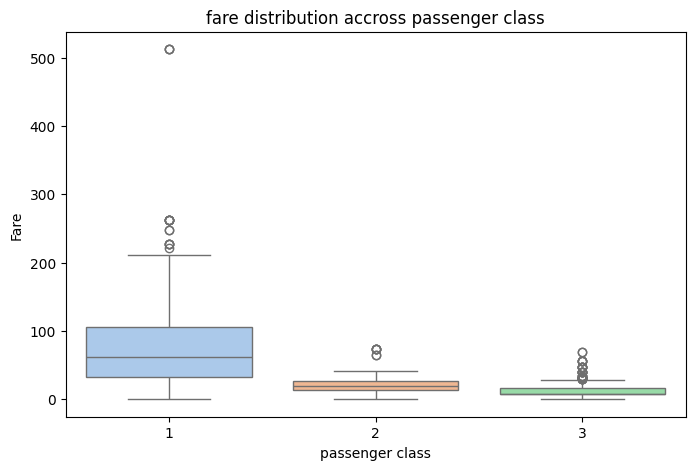

In [85]:
plt.figure(figsize =(8,5))
sns.boxplot(data = titanic, x='pclass', y ='fare', palette='pastel')
plt.xlabel("passenger class")
plt.ylabel("Fare")
plt.title("fare distribution accross passenger class")

In [86]:
#as we seen the distribution contain the outliers. so lets check the outliers

In [87]:
titanic.groupby('pclass')['fare'].describe()

count       mean        std  min      25%      50%      75%       max
pclass                                                                       
1       209.0  86.000578  78.905683  0.0  32.3208  61.9792  106.425  512.3292
2       164.0  21.889279  13.498846  0.0  13.0000  18.7500   26.000   73.5000
3       400.0  13.733999  10.710465  0.0   7.7750   8.0500   15.900   69.5500

In [88]:
Q1 = titanic.groupby('pclass')['fare'].quantile(0.25)

In [89]:
Q2 = titanic.groupby('pclass')['fare'].quantile(0.50)

In [90]:
Q3 = titanic.groupby('pclass')['fare'].quantile(0.75)

In [91]:
IQR = Q3 - Q1

In [92]:
lower_bound  = Q1 - 1.5 * IQR

In [93]:
higher_bound = Q3 + 1.5 * IQR

In [94]:
higher_bound

pclass
1    217.5813
2     45.5000
3     28.0875
Name: fare, dtype: float64

Text(0.5, 1.0, 'Fare Distribution byb pclass')

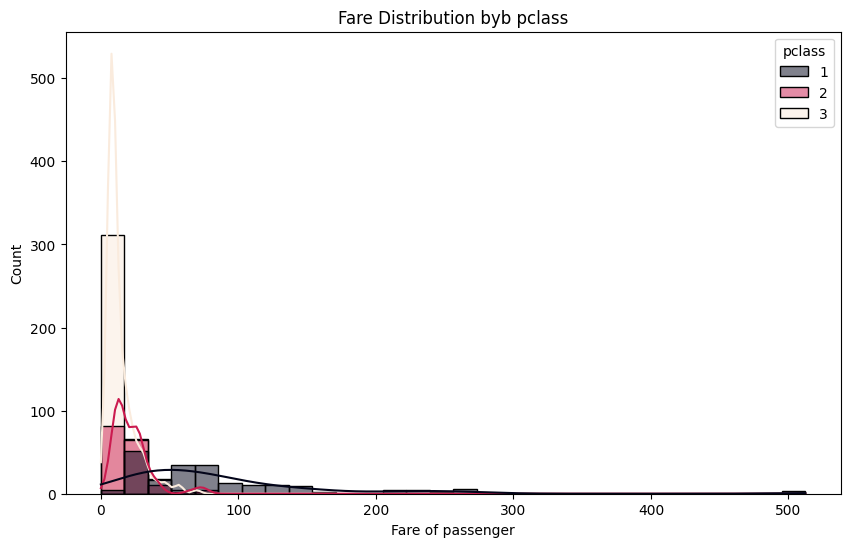

In [95]:
plt.figure(figsize=(10,6))
sns.histplot(data = titanic, x='fare', hue ='pclass', kde = True, bins = 30, palette='rocket')
plt.xlabel("Fare of passenger")
plt.ylabel("Count")
plt.title("Fare Distribution byb pclass")

#remove the fare outlier using regular one

In [96]:
Q1 = titanic['fare'].quantile(0.25)

In [97]:
Q3 = titanic['fare'].quantile(0.75)

In [98]:
IQR = Q3 - Q1

In [99]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [100]:
titanic_clean = titanic[(titanic['fare']>=lower_bound) & (titanic['fare']<= upper_bound)]

In [101]:
titanic_clean.groupby('pclass')['fare'].describe()

count       mean        std  min     25%      50%      75%      max
pclass                                                                     
1       112.0  39.568975  15.585120  0.0  26.550  34.8271  52.5542  71.2833
2       164.0  21.889279  13.498846  0.0  13.000  18.7500  26.0000  73.5000
3       400.0  13.733999  10.710465  0.0   7.775   8.0500  15.9000  69.5500

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data = titanic_clean, x='fare', hue ='pclass', kde = True, bins = 30, palette='rocket')
plt.xlabel("Fare of passenger")
plt.ylabel("Count")
plt.title("Fare Distribution byb pclass")

Text(0.5, 1.0, 'Fare Distribution byb pclass')

In [ ]:
plt.figure(figsize =(8,5))
sns.boxplot(data = titanic_clean, x='pclass', y ='fare', palette='pastel')
plt.xlabel("passenger class")
plt.ylabel("Fare")
plt.title("fare distribution accross passenger class")

#remove outliers by using def funcion

In [ ]:
def remove_outliers(df, column, groupby_col):

  def iqr_outliers_removal(sub_df):
    Q1 = sub_df[column].quantile(0.25)
    Q3 = sub_df[column].quantile(0.75)
    IQR = Q3 -Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return sub_df[(sub_df[column] >= lower_bound) & (sub_df[column] <= upper_bound)]
  return df.groupby(groupby_col, group_keys=False).apply(iqr_outliers_removal)


titanic_new_clean = remove_outliers(titanic, 'fare', 'pclass')


In [ ]:
plt.figure(figsize =(8,5))
sns.boxplot(data = titanic_new_clean , x='pclass', y ='fare', palette='pastel')
plt.xlabel("passenger class")
plt.ylabel("Fare")
plt.title("fare distribution accross passenger class")

#another way to remove outliers in fare by pclass

	fare
pclass
1	217.5813

2	45.5000

3	28.0875


In [ ]:
upper_bond_dict = {1: 217.5813 , 2: 45.50, 3: 28.0875}

In [ ]:
titanic['pclass'].unique()

In [ ]:
titanic_latest = titanic[
   ((titanic['pclass'] == 1) & (titanic['fare'] <= upper_bond_dict[1])) |
    ((titanic['pclass'] == 2) & (titanic['fare'] <= upper_bond_dict[2])) |
    ((titanic['pclass'] == 3) & (titanic['fare'] <= upper_bond_dict[3]))
]

In [ ]:
plt.figure(figsize =(8,5))
sns.boxplot(data = titanic_latest , x='pclass', y ='fare', palette='pastel')
plt.xlabel("passenger class")
plt.ylabel("Fare")
plt.title("fare distribution accross passenger class")

In [ ]:
#12. What is the relatonship between age and survival rates

In [ ]:
titanic('age').unique

In [ ]:
x=[0,10,20,30,40,50,60,70,80]

y=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80']

In [ ]:
titanic['age_group']=pd.cut(titanic['age'],bins=x,labels=y)